In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import warnings

In [4]:
warnings.filterwarnings("ignore")

# Load data

In [5]:
file = pd.read_csv("household_power_consumption.txt",delimiter=';')

In [6]:
df = pd.DataFrame(file)

In [7]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [8]:
df = df[(df.Global_active_power.str[0] != '?')]


# Subset the data from the dates 2007-02-01 and 2007-02-02.

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
period = (df['Date'] >= pd.to_datetime('2007-02-01')) & (df['Date'] <= pd.to_datetime('2007-02-02'))

In [11]:
df.loc[period]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
23432,2007-02-01,00:00:00,0.442,0.122,241.06,1.8,0.0,0.0,0.0
23433,2007-02-01,00:01:00,0.37,0.0,241.22,1.6,0.0,0.0,0.0
23434,2007-02-01,00:02:00,0.368,0.0,241.03,1.6,0.0,0.0,0.0
23435,2007-02-01,00:03:00,0.37,0.0,241.41,1.6,0.0,0.0,0.0
23436,2007-02-01,00:04:00,0.37,0.0,241.22,1.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
69505,2007-02-02,23:55:00,3.696,0.226,240.9,15.2,0.0,1.0,18.0
69506,2007-02-02,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
69507,2007-02-02,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
69508,2007-02-02,23:58:00,3.658,0.22,239.61,15.2,0.0,1.0,17.0


# Create a histogram

In [12]:
df['Global_active_power']=df['Global_active_power'].astype(float)

In [13]:
df['Global_reactive_power']=df['Global_reactive_power'].astype(float)

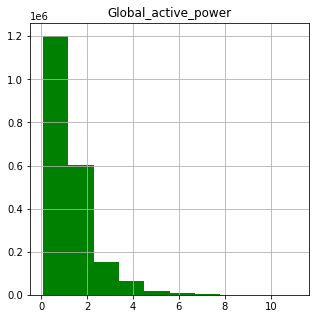

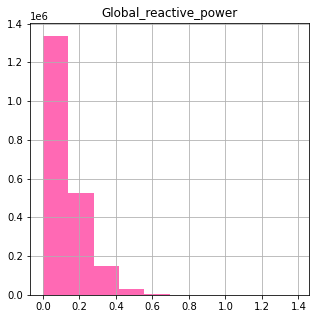

In [14]:
hist = df.hist('Global_active_power',figsize=(5,5),color='green')
ax = df.hist('Global_reactive_power',figsize=(5,5),color='hotpink')

# Create a Time series

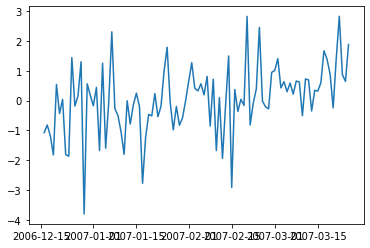

In [15]:
x1 = pd.date_range('2006-12-16',periods=100)
y1 = np.linspace(-0.75,1,100)+np.random.randn(100)
plt.plot(x1,y1)

# Create a plot for sub metering,multiple plot

In [16]:
df['Sub_metering_1']=df['Sub_metering_1'].astype(float)
df['Sub_metering_2']=df['Sub_metering_2'].astype(float)
df['Sub_metering_3']=df['Sub_metering_3'].astype(float)

<Axes: >

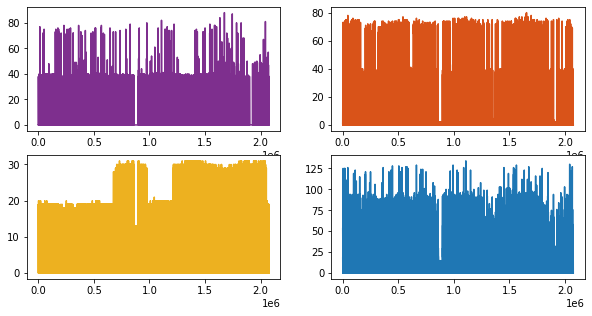

In [17]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
df.Sub_metering_1.plot(ax=axes[0,0],color="#7E2F8E")
df.Sub_metering_2.plot(ax=axes[0,1],color="#D95319")
df.Sub_metering_3.plot(ax=axes[1,0],color="#EDB120")

df['total_metering']= df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df.total_metering.plot(ax=axes[1,1])